# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Skewness value
from scipy.stats import skew

#preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb


print('Done')

Done


# Read The Data

In [ ]:
# Read file
df = pd.read_csv('/content/RiyadhVillasAqar.csv')
df.head(10)

/tmp/ipython-input-2871334936.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RiyadhVillasAqar.csv')


,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000
5,5,شمالية شرقية,7,2.0,5+,10.0,1.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,السويدي,غرب الرياض,800000.0,1600.000000
6,6,شمالية,6,2.0,5+,20.0,1.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,2100000.0,7636.363636
7,7,شمالية,7,3.0,5+,25.0,1.0,6.0,0.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1100000.0,3666.666667
8,8,جنوبية,5,2.0,4,14.0,0.0,35.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,الروضة,شرق الرياض,1900000.0,3247.863248
9,9,شمالية شرقية,5,5.0,5+,22.0,1.0,0.0,0.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1200000.0,3333.333333


# Data Exploring

In [ ]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [ ]:
# Shape
df.shape

(46826, 26)

In [ ]:
# Descripe the data
df.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


# Data Cleaning

In [ ]:
# Drop Uneeded column which is represent the index
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(7458)

In [ ]:
# Drop all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicates again
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check Missing Values
df.isnull().sum()

,0
front,0
rooms,0
lounges,872
bathrooms,0
streetWidth,156
stairs,0
propertyAge,0
driverRoom,0
tent,0
patio,0


In [ ]:
# Replace missing values (NaN) with 0
df["lounges"] = df["lounges"].fillna(0)

In [ ]:
# Take the Mean and fill the Missing Values
df["streetWidth"] = df["streetWidth"].fillna(df["streetWidth"].mean())

In [ ]:
# Drop the Missing Values
df = df.dropna(subset=["price", "square price"])

In [ ]:
def clean_plus(column):
    # Remove "+" sign, convert to numeric, and return cleaned column values
    return pd.to_numeric(df[column].astype(str).str.replace("+", "", regex=False), errors="coerce")

# Apply the cleaning function to multiple columns
df['lounges'] = clean_plus('lounges')      # Clean lounges column
df["bathrooms"] = clean_plus("bathrooms")  # Clean bathrooms column
df["apartments"] = clean_plus("apartments")# Clean apartments column

In [ ]:
# Convert the  values to integers
df["apartments"] = df["apartments"].astype(float).astype(int)
# Convert  values to integer type
df["lounges"] = df["lounges"].astype(float).astype(int)
# Convert from float to int
df["streetWidth"] = df["streetWidth"].astype(int)
# Convert from float to int
df["propertyAge"] = df["propertyAge"].astype(int)


In [ ]:
# Rename Columns
df = df.rename(columns={
    'square price': 'square_price',
    'furnihsed': 'furnished',
    'driverRoom': 'driver_room',
    'outdoorRoom': 'outdoor_room',
    'maidRoom': 'maid_room',
    'propertyAge': 'property_age',
    'streetWidth': 'street_width'
})

In [ ]:
# Convert the selected binary columns into boolean (True/False) values for easier modeling
binary_cols = [
    "driver_room", "tent", "patio", "kitchen", "outdoor_room",
    "garage", "duplex", "maid_room", "elevator", "furnished",
    "pool", "basement" , "stairs",
]

for col in binary_cols:
    df[col] = df[col].astype(bool)


In [ ]:
# Convert selected columns to numeric values
numeric_cols = [
    "rooms", "space", "street_width", "stairs", "property_age",
    "apartments", "bathrooms", "lounges", "price", "square_price"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [ ]:
# Convert text-based categorical columns into 'category' datatype for better memory and performance
cat_cols = ["front", "neighbourhood", "location"]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [ ]:
# Convert Arabic neighbourhood names into a simplified English transliteration
def simple_transliterate(text):
    mapping = {
        "ا": "a", "أ": "a", "إ": "i", "آ": "a",
        "ب": "b",
        "ت": "t",
        "ث": "th",
        "ج": "j",
        "ح": "h",
        "خ": "kh",
        "د": "d",
        "ذ": "th",
        "ر": "r",
        "ز": "z",
        "س": "s",
        "ش": "sh",
        "ص": "s",
        "ض": "d",
        "ط": "t",
        "ظ": "z",
        "ع": "a",
        "غ": "gh",
        "ف": "f",
        "ق": "q",
        "ك": "k",
        "ل": "l",
        "م": "m",
        "ن": "n",
        "ه": "h",
        "و": "w",
        "ي": "y",
        "ى": "a",
        "ء": "",
        "ئ": "y",
        "ؤ": "w",
        "ة": "h",
        " ": "",
    }

    text = str(text)
    result = ""
    for ch in text:
        result += mapping.get(ch, ch)
    return result.title()

df["neighbourhood"] = df["neighbourhood"].apply(simple_transliterate)

In [ ]:
# Convert Arabic front names into a simplified English transliteration
front_mapping = {
    "شمالية": "North",
    "جنوبية": "South",
    "شرقية": "East",
    "غربية": "West",
    "شمالية شرقية": "North-East",
    "شمالية غربية": "North-West",
    "جنوبية شرقية": "South-East",
    "جنوبية غربية": "South-West",
    "ثلاث شوارع": "3-streets",
    "أربع شوارع": "4-streets",
}

df['front'] = df['front'].replace(front_mapping)

/tmp/ipython-input-1096708896.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['front'] = df['front'].replace(front_mapping)


In [ ]:
# Convert Arabic location names into a simplified English transliteration
location_mapping = {
    "غرب الرياض": "West Riyadh",
    "شرق الرياض": "East Riyadh",
    "شمال الرياض": "North Riyadh",
    "جنوب الرياض": "South Riyadh",
    "وسط الرياض": "Central Riyadh"
}

df['location'] = df['location'].replace(location_mapping)

/tmp/ipython-input-1073637689.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['location'] = df['location'].replace(location_mapping)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39366 entries, 0 to 46824
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   front          39366 non-null  category
 1   rooms          39366 non-null  int64   
 2   lounges        39366 non-null  int64   
 3   bathrooms      39366 non-null  int64   
 4   street_width   39366 non-null  int64   
 5   stairs         39366 non-null  bool    
 6   property_age   39366 non-null  int64   
 7   driver_room    39366 non-null  bool    
 8   tent           39366 non-null  bool    
 9   patio          39366 non-null  bool    
 10  kitchen        39366 non-null  bool    
 11  outdoor_room   39366 non-null  bool    
 12  garage         39366 non-null  bool    
 13  duplex         39366 non-null  bool    
 14  space          39366 non-null  int64   
 15  apartments     39366 non-null  int64   
 16  maid_room      39366 non-null  bool    
 17  elevator       39366 non-null  bool 

In [ ]:
df.head(10)

,front,rooms,lounges,bathrooms,street_width,stairs,property_age,driver_room,tent,patio,...,apartments,maid_room,elevator,furnished,pool,basement,neighbourhood,location,price,square_price
0,East,5,4,5,20,True,0,True,True,True,...,0,False,False,False,False,False,Akaz,South Riyadh,1050000.0,3500.000000
1,West,4,3,5,20,True,0,True,True,True,...,2,True,True,False,False,False,Almhdyh,West Riyadh,3000000.0,5555.555556
2,South-East,7,2,5,15,True,31,True,False,True,...,0,True,False,False,False,False,Alshfa,South Riyadh,2000000.0,2285.714286
3,West,7,3,5,15,True,3,False,True,True,...,0,True,False,True,False,False,Zhrhlbn,West Riyadh,894000.0,4470.000000
4,North,4,2,4,25,True,0,True,True,True,...,3,True,True,True,False,False,Qrtbh,East Riyadh,3500000.0,8750.000000
5,North-East,7,2,5,10,True,0,False,True,True,...,0,False,False,False,False,False,Alswydy,West Riyadh,800000.0,1600.000000
6,North,6,2,5,20,True,0,False,True,True,...,0,False,True,False,False,False,Almhdyh,West Riyadh,2100000.0,7636.363636
7,North,7,3,5,25,True,6,False,True,True,...,0,True,False,False,False,False,Akaz,South Riyadh,1100000.0,3666.666667
8,South,5,2,4,14,False,35,False,False,True,...,0,False,False,False,False,False,Alrwdh,East Riyadh,1900000.0,3247.863248
9,North-East,5,5,5,22,True,0,False,False,True,...,0,True,False,False,False,False,Akaz,South Riyadh,1200000.0,3333.333333


In [ ]:
# Some neighbourhoods names are gibberish and have a few houses
# Drop any neighbourhood that has less than 25 house
df = df[df.groupby('neighbourhood')['neighbourhood'].transform('count') > 25]
df['neighbourhood'].unique()


array(['Akaz', 'Almhdyh', 'Alshfa', 'Zhrhlbn', 'Qrtbh', 'Alswydy',
       'Alrwdh', 'Alqadsyh', 'Bdr', 'Aljnadryh', 'Alshrq', 'Alaard',
       'Aldaralbyda', 'Alhmra', 'Twyq', 'Ahd', 'Alnhdh', 'Alkhlyj',
       'Ashbylyh', 'Almlkfysl', 'Alnsymalghrby', 'Alrmal', 'Htyn',
       'Alryan', 'Alnrjs', 'Alhzm', 'Alslam', 'Tybh', 'Alshafh',
       'Alazyzyh', 'Alflah', 'Almlqa', 'Alrhmanyh', 'Alndwh', 'Nmar',
       'Dyrab', 'Almayzylh', 'Zhrhnmar', 'Mtaralmlkkhaldaldwly',
       'Alghdyr', 'Alqyrwan', 'Almwnsyh', 'Alaryjaalghrbyh', 'Aalasamy',
       'Alyasmyn', 'Hnmar', 'Alrbwh', 'Almlkfhd', 'Alnkhyl', 'Alyrmwk',
       'Aldryhmyh', 'Zhrhalbdyah', 'Alnfl', 'Alandls', 'Alzhrh', 'Albyan',
       'Alnda', 'Alrwaby', 'Alaqyq', 'Sltanh', 'Alsaadh', 'Aljzyrh',
       'Mqady', 'Alalya', 'Almrwh', 'Ghrnath', 'Alazdhar', 'Alslymanyh',
       'Arqh', 'Alfarwq', 'Alnsymalshrqy', 'Alfyha', 'Almlz', 'Shbra',
       'Alrbya', 'Alnzym', 'Almnar', 'Alwrwd', 'Almsyf', 'Alqds',
       'Almrslat', 'Alnzhh', '

In [ ]:
# Filter rows where Villas Space is greater than 200 and less than or equal to 1000
df=df[(df['space'] > 200) & (df['space'] <= 1000)]

In [ ]:
# Select rows where the number of apartments in Villas is 3 or less
df= df[df["apartments"] <= 3]

In [ ]:
# Check the price column
# Some prices go as low as 1080, does not make any sense for a
df[df['price'] < 100000]

,front,rooms,lounges,bathrooms,street_width,stairs,property_age,driver_room,tent,patio,...,apartments,maid_room,elevator,furnished,pool,basement,neighbourhood,location,price,square_price
3848,West,1,2,5,20,False,0,False,False,False,...,0,False,False,False,False,False,Akaz,South Riyadh,1080.0,3.428571
12394,East,5,4,5,20,False,0,True,False,True,...,0,True,False,False,False,False,Hnmar,West Riyadh,90000.0,300.000000
13490,West,1,2,5,20,False,0,False,False,False,...,0,False,False,False,False,False,Akaz,South Riyadh,1080.0,3.428571
21565,South-East,4,2,5,20,False,0,False,False,True,...,0,False,False,False,False,False,Bdr,South Riyadh,70000.0,200.000000
30063,East,3,2,4,20,True,0,False,False,True,...,0,True,False,False,False,False,Akaz,South Riyadh,50000.0,125.000000
38220,East,3,2,4,20,True,0,False,False,True,...,0,True,False,False,False,False,Akaz,South Riyadh,50000.0,125.000000
42889,West,1,2,5,20,False,0,False,False,False,...,0,False,False,False,False,False,Akaz,South Riyadh,1080.0,3.428571


In [ ]:
# Drop houses with prices less than 100,000
df = df[df['price'] > 100000]

In [ ]:
# Check the street width column
# Some street width go as low as 1m, this just cannot be true
df[df['street_width'] < 8]

,front,rooms,lounges,bathrooms,street_width,stairs,property_age,driver_room,tent,patio,...,apartments,maid_room,elevator,furnished,pool,basement,neighbourhood,location,price,square_price
44,East,4,3,5,5,True,0,False,False,False,...,1,True,True,False,False,False,Bdr,South Riyadh,1500000.0,3571.428571
179,North-West,2,0,3,5,False,0,False,False,False,...,0,False,False,False,False,False,Alshfa,South Riyadh,900000.0,3461.538462
274,North,3,1,3,5,False,0,False,True,False,...,0,True,False,True,False,False,Twyq,West Riyadh,1200000.0,3333.333333
513,West,2,2,1,5,False,0,False,False,False,...,3,False,False,False,False,False,Bdr,South Riyadh,750000.0,1829.268293
692,North,5,4,5,5,False,0,False,False,True,...,0,False,False,False,False,False,Akaz,South Riyadh,1050000.0,3804.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46114,East,4,2,4,5,True,20,True,False,True,...,0,True,False,False,False,False,Alnhdh,East Riyadh,1650000.0,3666.666667
46284,North,4,1,4,5,False,0,False,False,True,...,2,False,False,False,False,False,Alswydy,West Riyadh,800000.0,2000.000000
46761,North-West,4,1,4,5,False,0,True,False,False,...,0,True,True,False,True,False,Alnrjs,North Riyadh,2900000.0,11068.702290
46775,North,4,2,5,5,True,0,False,False,True,...,0,True,False,False,False,False,Alnrjs,North Riyadh,2050000.0,8200.000000


In [ ]:
# Drop houses with street width less than 8m
df = df[df['street_width'] >= 8]

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
# Statistical Overview
# mean value is driven up in both price and space columns, this will be investigated later
df.describe()

,rooms,lounges,bathrooms,street_width,property_age,space,apartments,price,square_price
count,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,3.457600e+04,34576.000000
mean,4.671333,2.307612,4.529327,18.212431,2.239877,360.953696,0.752401,2.206766e+06,6052.296166
std,1.085086,1.035819,0.807597,3.762581,6.154639,131.224063,0.910473,1.910365e+06,4530.441857
min,1.000000,0.000000,1.000000,8.000000,0.000000,201.000000,0.000000,1.011000e+05,116.206897
25%,4.000000,2.000000,4.000000,15.000000,0.000000,288.000000,0.000000,1.200000e+06,3833.333333
50%,5.000000,2.000000,5.000000,20.000000,0.000000,315.000000,0.000000,1.600000e+06,4933.333333
75%,5.000000,3.000000,5.000000,20.000000,0.000000,390.000000,1.000000,2.600000e+06,7581.227437
max,7.000000,7.000000,5.000000,100.000000,35.000000,1000.000000,3.000000,5.650000e+07,136144.578313


In [ ]:
df.to_csv("RiyadhVillasAqar_cleanest.csv", index=False)

### Exploratory Data Analysis (EDA)

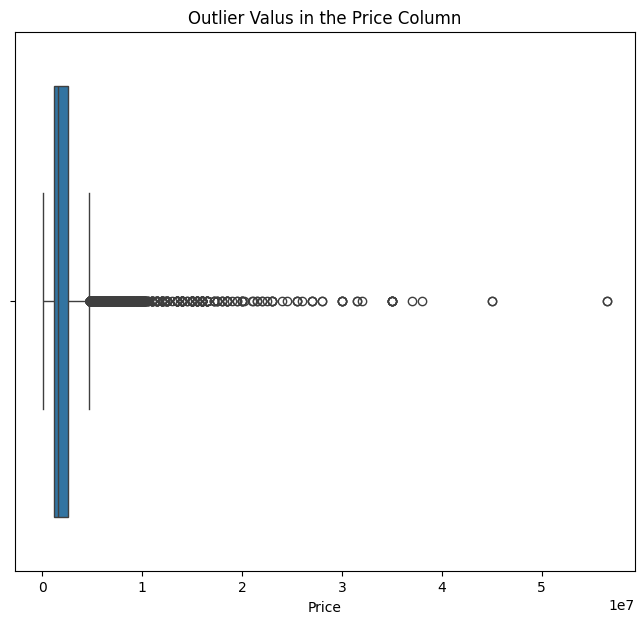

In [ ]:
# Plot price values using boxplot to detect outlier values
plt.figure(figsize=(8,7))
sns.boxplot(data=df, x='price')
plt.title('Outlier Valus in the Price Column')
plt.xlabel('Price')
plt.show()

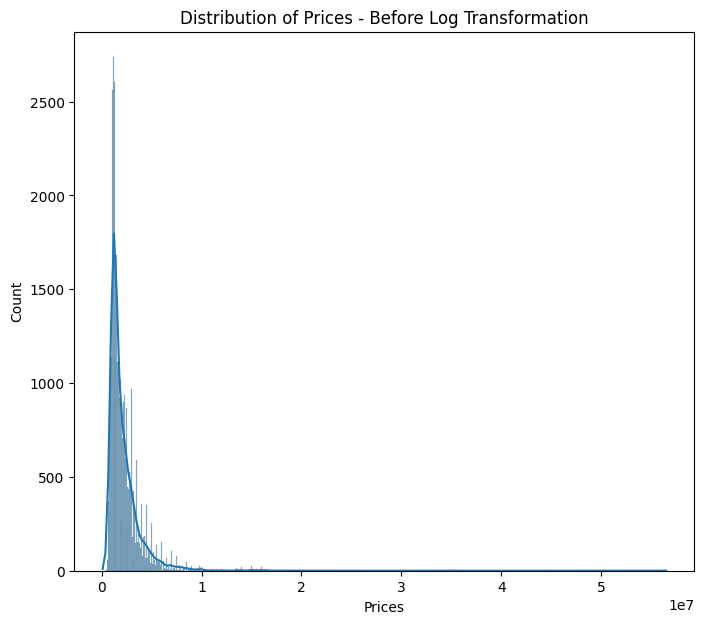

In [ ]:
# Check the price distribution
plt.figure(figsize=(8,7))
sns.histplot(data=df, x='price', kde=True)

plt.title('Distribution of Prices - Before Log Transformation')
plt.xlabel('Prices')
plt.show()

In [ ]:
# From previous figure, we can see there is huge positive skew in prices
# Get the exact sekwness value, using skew() from scipy.stats library
# If the skewness value is higher than 1, it is considered highly skewed
skew_value = df['price'].skew()
print(f"Skewness: {skew_value:.2f}")

Skewness: 7.03


In [ ]:
# Treating the massive positive skew by applying Log Transformation
# Apply log transformation
df['price_log'] = np.log1p(df['price'])


# Check the new skewness
new_skew = df['price_log'].skew()
print(f"Skewness after Log Transform: {new_skew:.2f}")

Skewness after Log Transform: 0.82


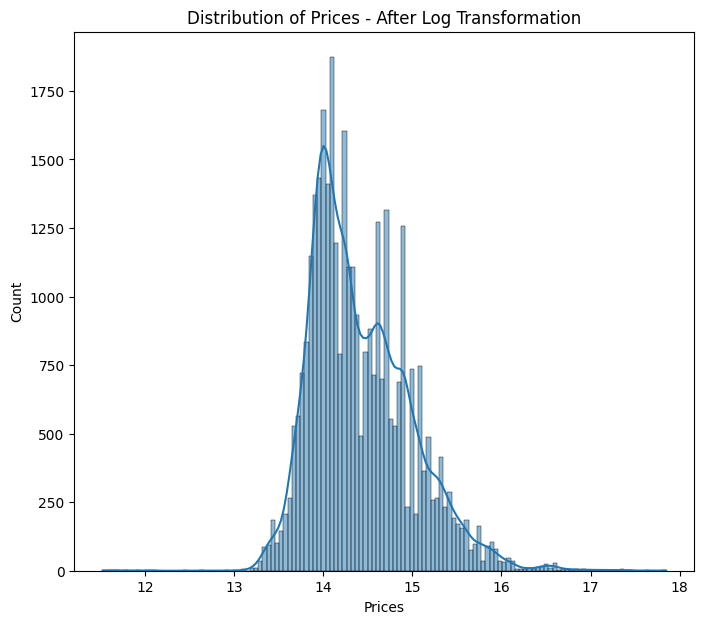

In [ ]:
# Check the price distribution
plt.figure(figsize=(8,7))
sns.histplot(data=df, x='price_log', kde=True)

plt.title('Distribution of Prices - After Log Transformation')
plt.xlabel('Prices')
plt.show()

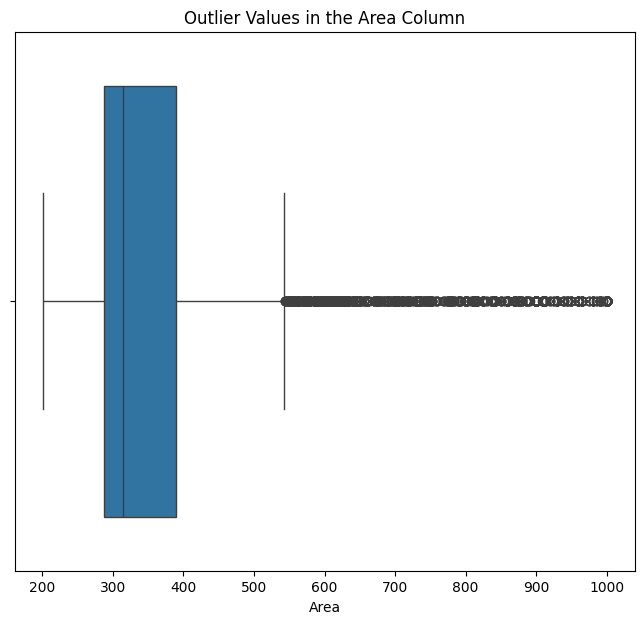

In [ ]:
# Plot area values using boxplot to detect outlier values
plt.figure(figsize=(8,7))
sns.boxplot(data=df, x='space')
plt.title('Outlier Values in the Area Column')
plt.xlabel('Area')
plt.show()

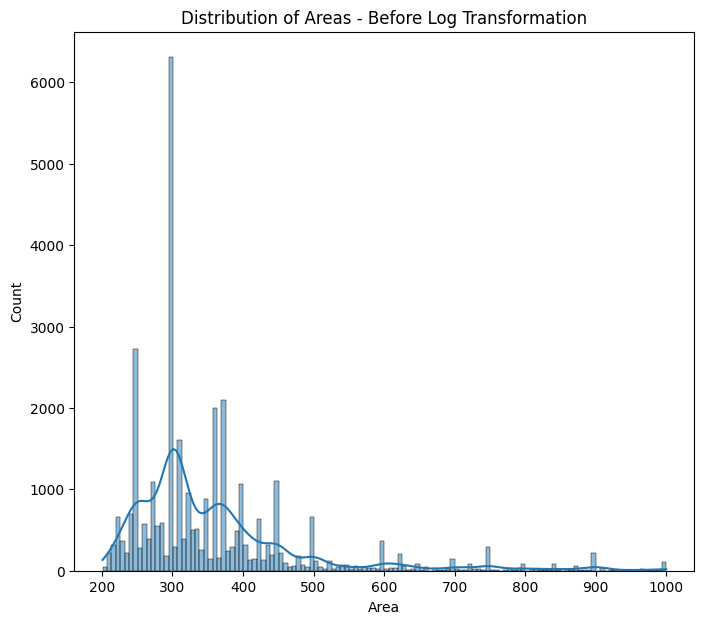

In [ ]:
# Check the Area distribution
plt.figure(figsize=(8,7))
sns.histplot(data=df, x='space', kde=True)

plt.title('Distribution of Areas - Before Log Transformation')
plt.xlabel('Area')
plt.show()

In [ ]:
# From previous figure, we can see there is high positive skew in spaces
# We can see it in numbers, using the following function
skew_value = df['space'].skew()
print(f"Skewness: {skew_value:.2f}")

Skewness: 2.23


In [ ]:
# Apply Log Transformation on the Space column
df['space_log'] = np.log1p(df['space'])

# Check the new skewness
new_skewed_space = df['space_log'].skew()
print(f"Skewness after Log Transform: {new_skew:.2f}")

Skewness after Log Transform: 0.82


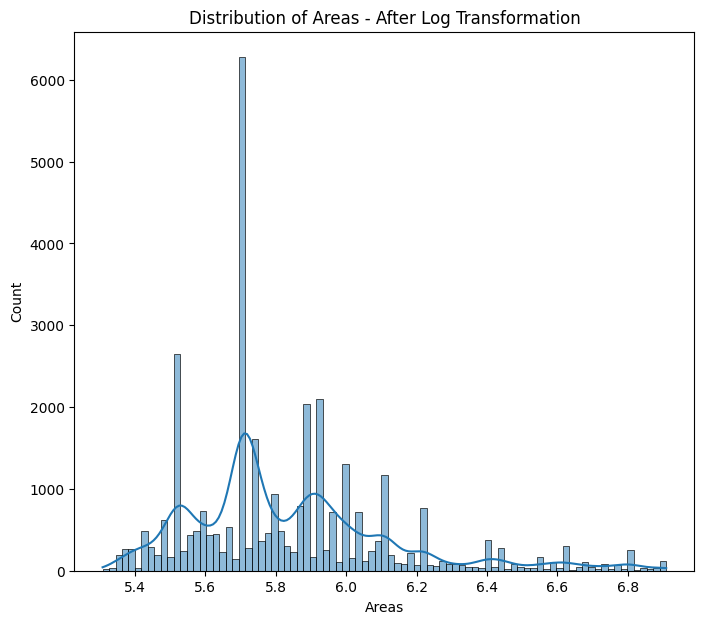

In [ ]:
# Check the space distribution
plt.figure(figsize=(8,7))
sns.histplot(data=df, x='space_log', kde=True)

plt.title('Distribution of Areas - After Log Transformation')
plt.xlabel('Areas')
plt.show()

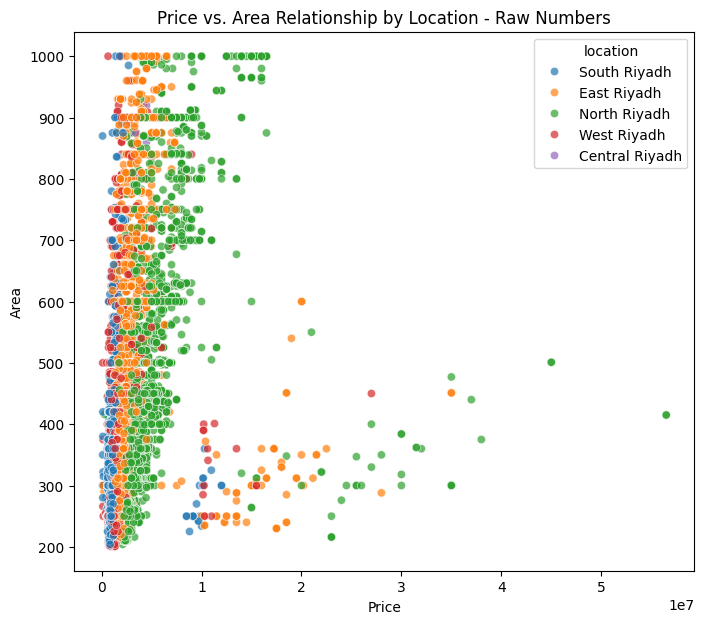

In [ ]:
# Relationship between space and price using scatter plot (Without Log Transormation)
plt.figure(figsize=(8,7))
sns.scatterplot(data=df, x='price', y='space', hue='location', alpha=0.7)

plt.title('Price vs. Area Relationship by Location - Raw Numbers')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

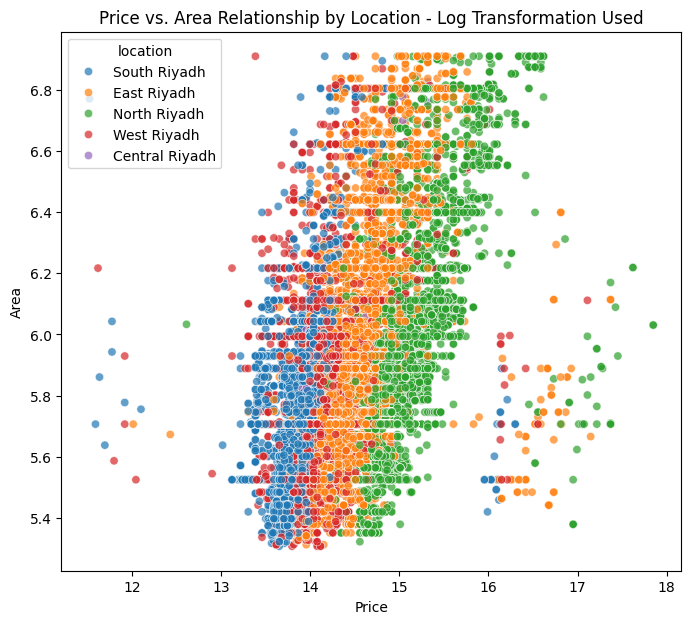

In [ ]:
# Relationship between space and price using scatter plot (With Log Transformation)
plt.figure(figsize=(8,7))
sns.scatterplot(data=df, x='price_log', y='space_log', hue='location',alpha=0.7)

plt.title('Price vs. Area Relationship by Location - Log Transformation Used')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

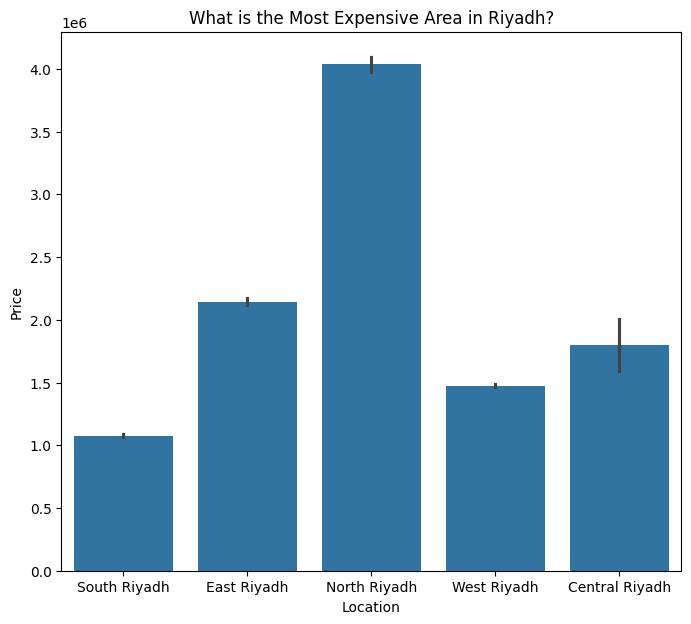

In [ ]:
# Which are of Riyadh is the most expensive?

plt.figure(figsize=(8,7))
sns.barplot(data=df, x='location', y='price')

plt.title('What is the Most Expensive Area in Riyadh?')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

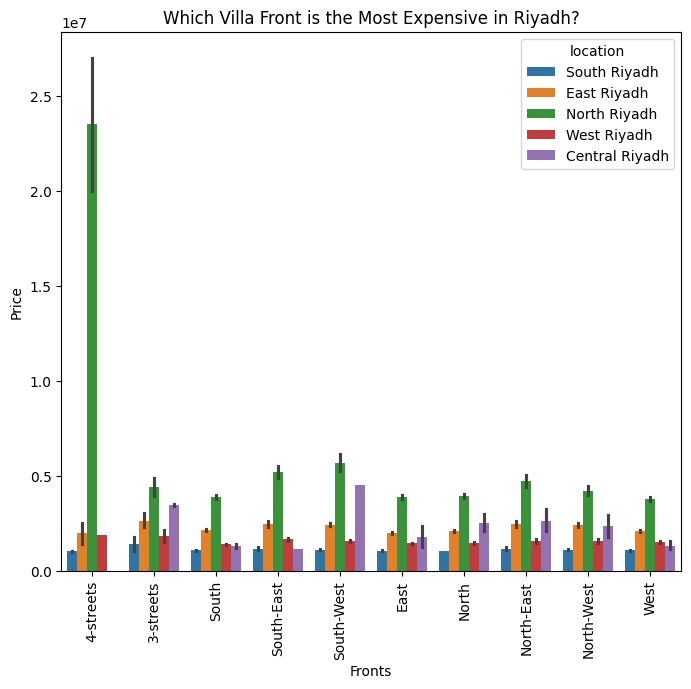

In [ ]:
# Which villa fron is the most expensive?

plt.figure(figsize=(8,7))
sns.barplot(data=df, x='front', y='price', hue='location')

plt.title('Which Villa Front is the Most Expensive in Riyadh?')
plt.xlabel('Fronts')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

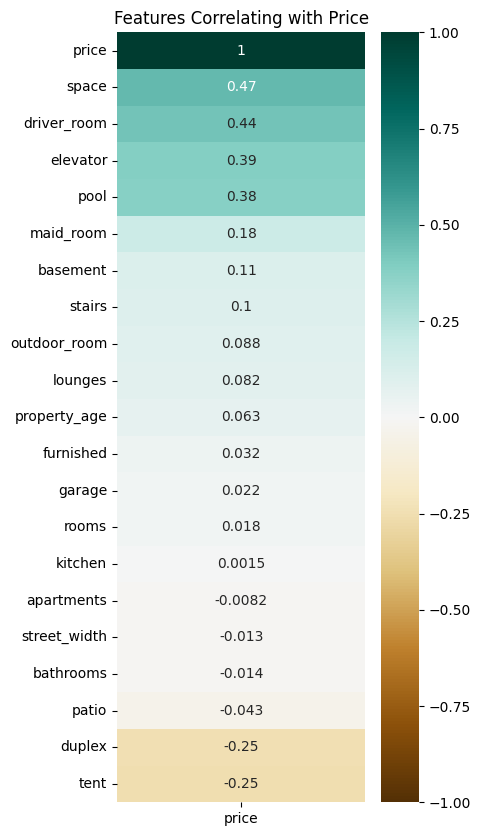

In [ ]:
# Draw a heatmap to detect strong correlations with the target (Price)

#Convert all boolean features into 0 and 1
binary_cols = [
    "driver_room", "tent", "patio", "kitchen", "outdoor_room",
    "garage", "duplex", "maid_room", "elevator", "furnished",
    "pool", "basement" , "stairs" ,
]

for col in binary_cols:
    df[col] = df[col].astype(int)

# Create a new subset of the dataframe that only include numrical values
numeric_df = df.select_dtypes(include=['number'])

# Exclude some redudant features
numeric_df = numeric_df.drop(columns=['price_log','space_log','square_price'])

# 4. Create the Heatmap
plt.figure(figsize=(4, 10))

# Calculate correlations with just the target
# 'price' is your target column
heatmap_data = numeric_df.corr()[['price']].sort_values(by='price', ascending=False)

# Plot
sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Features Correlating with Price')
plt.show()

# **Models_Validation**


1.   SVM
2.   Random Forest Regressor
1.   XGBoost






In [ ]:
def evaluate_models(name, model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f' Model = {name}')
    print(f' MSE = {mse:.4f}')
    print(f' RMSE = {rmse:.4f}')
    print(f' MAE = {mae:.4f}')
    print(f' R2 = {r2:.4f}')
    print(20 * '=')

    return {
        'model':name,
        'mse':mse,
        'rmse':rmse,
        'mae':mae,
        'r2':r2
    }


# Split

In [ ]:
#Drop any columns related to the target to avoid data leakage
df = df.drop(columns=['price', 'square_price','space'])
target = 'price_log'
#specify input (X) and output (target) for the model
X = df.drop(columns=[target])
y = df[target]
#split the data into train and test sets before encoding to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
#ٌRandom_Forest

# Copy data for this model only
X_rf_train = X_train.copy()
X_rf_test  = X_test.copy()
y_rf_train = y_train.copy()
y_rf_test  = y_test.copy()

# categorical columns
cat_cols2 = ['front', 'neighbourhood', 'location']

for col in cat_cols2:
    le = LabelEncoder()
    X_rf_train[col] = le.fit_transform(X_rf_train[col].astype(str))
    X_rf_test[col]  = le.transform(X_rf_test[col].astype(str))


In [ ]:
#SVR

X_svr_train = X_train.copy()
X_svr_test  = X_test.copy()
y_svr_train = y_train.copy()
y_svr_test  = y_test.copy()


# categorical columns
cat_cols = ['front', 'neighbourhood', 'location']

# numerical columns
num_cols = [
    col for col in X_svr_train.columns
    if X_svr_train[col].dtype in ['int64', 'float64', 'float32']
    and col not in cat_cols
]

# Preprocessor
svr_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),                      #  Scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) #  OneHot
    ]
)

In [ ]:
#XGBoost

X_xgb_train = X_train.copy()
X_xgb_test = X_test.copy()
y_xgb_train = y_train.copy()
y_xgb_test = y_test.copy()


cat_cols = ['front', 'neighbourhood', 'location']
for col in cat_cols:
    le2 = LabelEncoder()
    X_xgb_train[col] = le2.fit_transform(X_xgb_train[col].astype(str))
    X_xgb_test[col] = le2.transform(X_xgb_test[col].astype(str))

param_grid = {
    'n_estimators': [500, 1000,1500],
    'learning_rate': [0.01,0.03, 0.05],
    'max_depth': [5, 6,7],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


In [ ]:
results= []

#1.Random Forest
rf_pipeline = Pipeline(steps=[
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

# Evaluate
results.append(
    evaluate_models(
        'Random Forest',
        rf_pipeline,
        X_rf_train, X_rf_test,
        y_rf_train, y_rf_test
    )
)

#---------------------------------------------------------------

# 2. SVR
svr_pipeline = Pipeline(steps=[
    ('preprocess', svr_preprocessor),
    ('model', SVR(kernel='rbf'))
])

# Evaluate
results.append(
    evaluate_models('SVR', svr_pipeline,
                    X_svr_train, X_svr_test,
                    y_svr_train, y_svr_test)
)



#---------------------------------------------------------------

#3. XGBoost

xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=0
)

grid_search.fit(X_xgb_train, y_xgb_train)

best_xgb = grid_search.best_estimator_

# Evaluate
results.append(
    evaluate_models('XGBoost', best_xgb, X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test)
)



 Model = Random Forest
 MSE = 0.0327
 RMSE = 0.1808
 MAE = 0.0967
 R2 = 0.8936
 Model = SVR
 MSE = 0.0323
 RMSE = 0.1796
 MAE = 0.0979
 R2 = 0.8949
 Model = XGBoost
 MSE = 0.0241
 RMSE = 0.1551
 MAE = 0.0803
 R2 = 0.9217
